# Mining the Web of HTML-embedded Product Data
# Product Matching
Jakub Riegel
Winter 2020

https://ir-ischool-uos.github.io/mwpd/

---
## Env

In [2]:
import pandas as pd

In [3]:
OFFERS_CORPUS = './data/offers_corpus_english_v2_non_norm_swc.json'
OFFERS_CORPUS_SMALL = './data/corpus_small.json'

---
## Data

### Corpus

#### Data format
We offer the product data corpus in JSON format. Offers having the same cluster ID attribute are considered to describe the same real-world product while different cluster IDs signify different products. The grouping of offers into clusters is subject to some degree of noise (approx. 7%) as it has been constructed using a heuristic to cleanse the product identifiers, such as GTINs and MPNs, found on the Web. Every JSON object describing an offer has the following JSON properties:

* id: Unique identifier of an offer (random integer) (DO NOT USE AS FEATURE!)
* cluster_id: The heuristically assigned identifier of the cluster to which an offer belongs (DO NOT USE AS FEATURE!)
* category: One of 25 product categories the product was assigned to
* title: The product offer title
* description: The product offer description
* brand: The product offer brand
* price: The product offer price
* specTableContent: The specification table content found on the website of the product offer as one string
* keyValuePairs: The key-value pairs that were extracted from the specification tables.

#### Upload

In [4]:
corpus = pd.read_json(OFFERS_CORPUS_SMALL, lines=True, orient='records')

In [5]:
len(corpus)

3000000

In [6]:
corpus.head()

,id,cluster_id,category,title,description,brand,price,keyValuePairs,specTableContent
0,11920489,2533918,Musical_Instruments,"""Ritter RGP5-D/BSG Performance 5 Series Bag: ...","""\nThe Ritter RGP5-D padded gigbag offers styl...",None,None,None,None
1,12648455,11167803,Tools_and_Home_Improvement,"""Krowne - 14-802L 8 in Royal Series Wall Moun...","""The 14-802L Royal Series Wall Mount Faucet w/...","""Krowne""@en",None,None,None
2,7634831,11621476,Jewelry,"""A. Jaffe Art Deco ME2105Q-163"" ""Shop A. MES6...","""<p> An everlasting symbol of love, model num...",None,None,None,None
3,16519583,8824768,Sports_and_Outdoors,"""Gore bike wear Element Lady 2in1 Shorts"" Sho...","""\n\t\tProduktbeskrivning Gore bike wear Eleme...","""Gore bike wear""",None,None,None
4,3362858,7523117,Shoes,,None,None,"""USD""",None,None


In [7]:
def distinct(column: str) -> pd.DataFrame:
    df = corpus[[column, 'id']].groupby([column]).count()
    return df.sort_values(by='id', ascending=False)

#### Distict products

In [8]:
products = distinct('cluster_id')
products.head()

,id
cluster_id,
6752244,9574
8210849,9539
2031087,9472
8117288,9449
6493281,8697


In [35]:
len(products)

2243050

In [10]:
len(products[products['id'] > 1])

183229

#### Categories

In [11]:
categories = distinct('category')
categories

,id
category,
Office_Products,393312
Tools_and_Home_Improvement,281551
Home_and_Garden,266802
Automotive,251303
Clothing,200816
Sports_and_Outdoors,163752
Other_Electronics,158273
Jewelry,148414
Books,125832


In [12]:
len(categories)

25

<AxesSubplot:ylabel='id'>

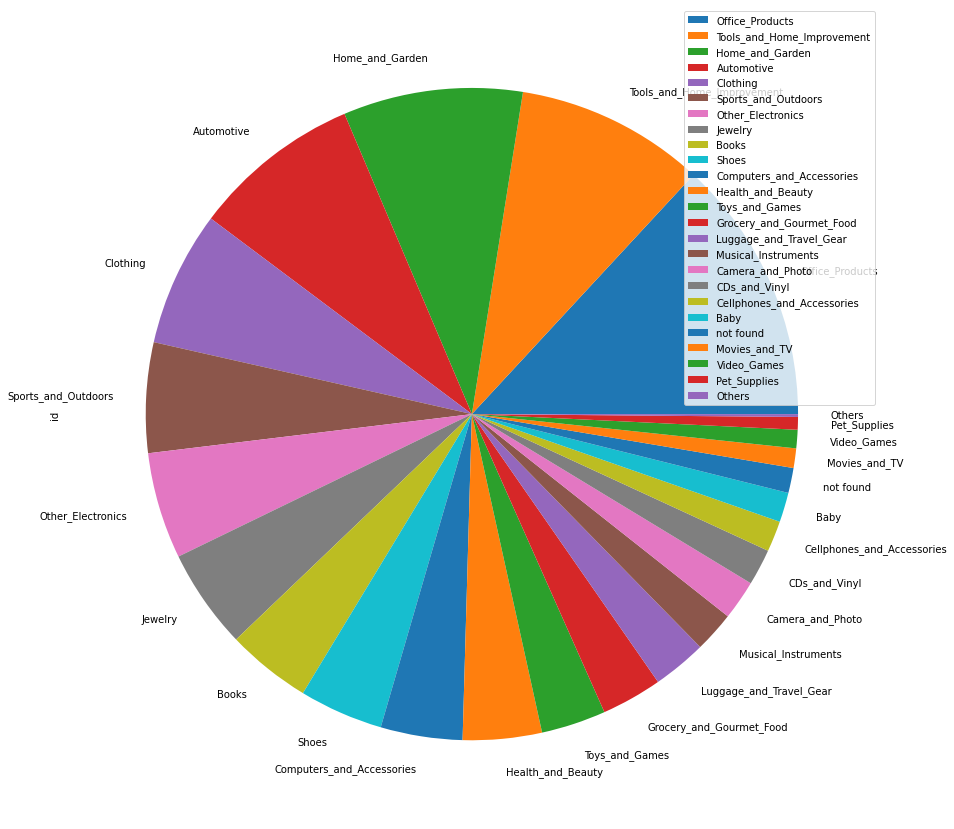

In [13]:
categories.plot.pie(y='id', figsize=(55,15))

#### Brands

In [14]:
brands = distinct('brand')
brands.head(15)

,id
brand,
"""Baseball Monkey""@en",74080
"""HP Enterprise""",30643
"""*""",25209
"""Null""",14842
"""Null""@en",8929
"""Jaguar""@en",8117
"""Genuine BMW""",6989
"""Land Rover""@en",5881
"""Texas Instruments""",4270


In [15]:
len(brands)

121040

In [19]:
corpus[corpus['brand'] == "\"Null\"@en"].head()

,id,cluster_id,category,title,description,brand,price,keyValuePairs,specTableContent
83,9141983,6310626,Home_and_Garden,"""Tulane Green Wave Colossal Wrap""@en Wrap | T...","""\n\nRide a colossal Tulane Green Wave of prid...","""Null""@en",None,None,None
92,4342281,245869,Office_Products,"""HP Colour LaserJet Pro MFP M477fdn""@en Print...",None,"""Null""@en",None,None,None
506,2576189,4707205,Tools_and_Home_Improvement,"""64"" Dimplex Upton Espresso Electrical Firepl...","""The Upton provides a focal point for any dini...","""Null""@en",None,None,None
654,394409,10218445,not found,"""3D sheet Blumen-Mädchen - Format A4""@en shee...",None,"""Null""@en",None,None,None
689,7673036,15162310,Clothing,"""Regatta Men's Cera III Softshell Jacket""@en","""\n\t The men's Cera III is a best-selling ...","""Null""@en",None,"{'92 - 98': '52 - 53', '98 - 104': '53 - 54', ...",Size Chest (Inches) Chest (cm) Waist (Inches)...


In [20]:
corpus[corpus['brand'] == "\"*\""].head()

,id,cluster_id,category,title,description,brand,price,keyValuePairs,specTableContent
25,951124,2092365,Automotive,"""Honda PROTECTOR, R. FR. DOOR *R78P*"" *R78P* ...",None,"""*""",None,None,None
55,10447015,2578011,Automotive,"""Honda MOTOR SET"" "" 53602-SNR-A02 | Honda SET...",None,"""*""",None,None,None
772,13320490,15767330,Automotive,"""Honda SEAT BELT ASSY., R. RR. *YR89L* (NIPPO...",None,"""*""",None,None,None
829,15379237,5945648,Automotive,"""Honda COVER B, IN. MANIFOLD"" "" 17113-P0G-A00...",None,"""*""",None,None,None
834,7855587,2659909,Automotive,"""Honda FLOOR MAT, FR. *B14L*(NOT AVAILABLE)"" ...",None,"""*""",None,None,None


In [21]:
corpus[corpus['keyValuePairs'].notnull()][['title', 'category', 'keyValuePairs']].head()

,title,category,keyValuePairs
21,"""Bushing, Series F, Bore Dia 1.625 In""@en In ...",Tools_and_Home_Improvement,{'Includes: Bolts and Washers': 'Item: Quick D...
23,""" TPS-2031 Flat Panel Fixed Truss & Pole Moun...",Other_Electronics,"{'Number of Displays': '1', 'Mounting-Hole Pat..."
32,"""Deformed Clip Haikyu!! Second Season Vol. 2 ...",Movies_and_TV,"{'Original Name ': 'でふぉめくりっぷ ハイキュー!! vol.2', '..."
44,"""No.6 (3.5mm) x 40mm Pozi Button Head Wood Sc...",Tools_and_Home_Improvement,"{'Finish': 'Chemical Matte Black', 'Head Diame..."
59,"""BD450DAJZH HP 450-GB 10K FC-AL HDD"", ""Null"" ...",Computers_and_Accessories,"{'Category': 'Storageworks HDD', 'Sub-Category..."


#### Spec table

#### Params

---
## Features

---
## Model

### Algorithm for training
1. Tokenize text
1. Lemmanize text
1. Divide by categories
1. Train category specific models

### Algorithm for predictios
1. Divide by categoires
1. Find EANs
1. For not matched predict with category specific model


### Env

In [104]:
from nltk.stem.snowball import SnowballStemmer
import nltk 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [105]:
# only for first run!
# nltk.download()

## Data

In [168]:
data = corpus.copy()
data = data[data['category'] == 'Tools_and_Home_Improvement'].head(7_000)

In [173]:
import re

class StringParser:
  def __init__(self, text):
    self.text = text
  
  def rm(self, reg, char=" "):
    self.text = re.sub(reg, char, self.text)
    return self
  
  #usuniecie spacji na początku i końcu tekstu
  def toString(self):
    if self.text.strip() == '': #jeśli string jest pusty to zwracamy None
      return ''
    return self.text.strip() 

# '\|[\s\w]+' czyszczenie brandów za pionowymi kreskami lub samych pionowych kresek
# '\@([\w\-])+' czyszczenie języków
# '\<[[A-z\/]*\>' czyszczenie z HTML'a
# '\'\ |\ \'|(\s|\")+' czyszczenie białych (\n, ,\t ,\" ,\r ,\' ze spacją przed i lub z ["Women's" lub o'clock powinno zostać jak jest]), czyszczenie zwielokrotnionych spacji w środku

def czyszczacz_slow(text):
  return StringParser(text).rm(r'\|[\s\w]+').rm(r'\@([\w\-])+').rm(r'\<[[A-z\/]*\>').rm(r'\'\ |\ \'|(\s|\")+').toString()

In [174]:
data['parsed'] = data['title'].map(czyszczacz_slow)

In [187]:
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer

# https://medium.com/@ishan16.d/text-classification-in-python-with-scikit-learn-and-nltk-891aa2d0ac4b
# https://towardsdatascience.com/multi-class-text-classification-with-sklearn-and-nltk-in-python-a-software-engineering-use-case-779d4a28ba5
# https://github.com/anhaidgroup/deepmatcher

def stemmer(x):
 stemmer = PorterStemmer()
 return ' '.join([stemmer.stem(word) for word in x])
 
def lemmatize(x):
 lemmatizer = WordNetLemmatizer()
 return ' '.join([lemmatizer.lemmatize(word) for word in x])

In [176]:
data['tokens'] = data['parsed'].map(nltk.word_tokenize)
data['text'] = data['tokens'].map(stemmer)

In [177]:
len(data)

7000

In [178]:
data.head(3)

,id,cluster_id,category,title,description,brand,price,keyValuePairs,specTableContent,parsed,tokens,text
1,12648455,11167803,Tools_and_Home_Improvement,"""Krowne - 14-802L 8 in Royal Series Wall Moun...","""The 14-802L Royal Series Wall Mount Faucet w/...","""Krowne""@en",None,None,None,Krowne - 14-802L 8 in Royal Series Wall Mount ...,"[Krowne, -, 14-802L, 8, in, Royal, Series, Wal...",krown - 14-802l 8 in royal seri wall mount fau...
10,9224645,3333658,Tools_and_Home_Improvement,"""Bee line Dragway Sign"" ""Drag Racing - Signs ...","""Bee Line Dragway in Arizona - Smell the smoke...",None,"""USD"", ""99.95""",None,None,Bee line Dragway Sign Drag Racing - Signs from...,"[Bee, line, Dragway, Sign, Drag, Racing, -, Si...",bee line dragway sign drag race - sign from ga...
21,6596017,4266748,Tools_and_Home_Improvement,"""Bushing, Series F, Bore Dia 1.625 In""@en In ...",None,"""GATES""@en",None,{'Includes: Bolts and Washers': 'Item: Quick D...,Zoro #: G2309316 Mfr #: F 1 5/8 Includes: Bol...,"Bushing, Series F, Bore Dia 1.625 In In F 1 5/...","[Bushing, ,, Series, F, ,, Bore, Dia, 1.625, I...","bush , seri F , bore dia 1.625 In In F 1 5/8 ...."


### Test & Train Data

In [179]:
features = 'text'
target = 'cluster_id'

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

### Train

In [180]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
pipe_mnnb = Pipeline(steps = [
    ('tf', TfidfVectorizer()),
    ('mnnb', MultinomialNB())
])

In [181]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

pgrid_mnnb = {
 'tf__max_features' : [1000, 2000, 3000],
 'tf__stop_words' : ['english', None],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'mnnb__alpha' : [0.1, 0.5, 1]
}

gs_mnnb = GridSearchCV(pipe_mnnb,pgrid_mnnb,cv=5,n_jobs=-1)
gs_mnnb.fit(X_train, y_train)

c:\users\jakub\dev\zti_project\venv\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('mnnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'mnnb__alpha': [0.1, 0.5, 1],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__stop_words': ['english', None],
                         'tf__use_idf': [True, False]})

In [185]:
gs_mnnb.score(X_train, y_train)

0.9146428571428571

In [186]:
gs_mnnb.score(X_test, y_test)

0.0064285714285714285

In [ ]:
# ~63%

### Prepare

In [30]:
cats = list(corpus['category'].unique())
cats

['Musical_Instruments',
 'Tools_and_Home_Improvement',
 'Jewelry',
 'Sports_and_Outdoors',
 'Shoes',
 'Office_Products',
 'Toys_and_Games',
 'Books',
 'Computers_and_Accessories',
 'Automotive',
 'Other_Electronics',
 'Clothing',
 'Home_and_Garden',
 'Video_Games',
 'Camera_and_Photo',
 'Baby',
 'Movies_and_TV',
 'Cellphones_and_Accessories',
 'Grocery_and_Gourmet_Food',
 'CDs_and_Vinyl',
 'Others',
 'Health_and_Beauty',
 'not found',
 'Luggage_and_Travel_Gear',
 'Pet_Supplies']

# Brudnopis